In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import cm
from tqdm import tqdm
import seaborn as sns

In [ ]:
def estimate(data, missing, know):
    data = np.multiply(data, missing)
    if know :
        output = np.sum(data) / (data.shape[0] * target['presence'])
    else :
        output = np.sum(data) / (np.sum(missing))

    return output

def simu(target, know = True):
    output = []

    for k in range(target['niter']):
        probs = []
        estimator_store = np.zeros(len(target['n_sample']))
        obs_all = target['simulation'](np.max(target['n_sample']))
        I = np.transpose(np.random.binomial(1,target['presence'], np.max(target['n_sample'])))
        obs_all = np.transpose(np.reshape([obs_all, I], (2, np.max(target['n_sample']))))
        for i in range(0, len(target['n_sample'])) :
            obs = obs_all[:target['n_sample'][i]]
            estimator = estimate(obs[:,0], obs[:,1], know)
            estimator_store[i] = estimator
            probs.append(target['presence'])

        output_cbind = np.c_[estimator_store, target['n_sample'], np.arange(len(target['n_sample'])),probs]
        output.append(output_cbind)
    return output

def var_missing(p_x, m, sigma):
    value = (p_x**-1)*(sigma**2 + m**2) - m**2
    return value

def var_miss(p_x, sigma):
    value = (p_x**-1)*(sigma**2)
    return value

def gauss(x, x0, sigma):
    return np.sqrt(1 / (2*np.pi * sigma**2)) * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2) )

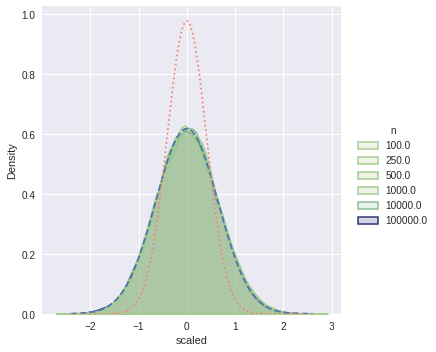

In [ ]:
target = {}

def rand(n):
  sample = np.random.uniform(0,1,n)
  return sample

target['niter'] = 10000
target['simulation'] = rand
target['presence'] = 0.5
target['n_sample'] = [100,250,500,1000,10000,100000]

mean = 1/2
cov = np.sqrt(1/12)
	
dataset = simu(target, know = True)
df_FMado = pd.DataFrame(np.concatenate(dataset))
df_FMado.columns = ['estimate', 'n', 'gp', 'prob']

df_FMado['scaled'] = (df_FMado.estimate - mean) * np.sqrt(df_FMado.n)
m = 0
sigma = np.sqrt(var_missing(target['presence'], mean, cov))
sigma_2 = np.sqrt(var_miss(target['presence'], cov))
x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,m, sigma)
gauss_2 = gauss_function(x, m, sigma_2)

cmap = cm.get_cmap('OrRd')
sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'kde', common_norm = False, alpha = 0.2, fill = True, linewidth = 1.5)
plt.plot(x,gauss, linestyle = '--')
plt.plot(x, gauss_2, c = 'salmon', linestyle = 'dotted')
plt.show()

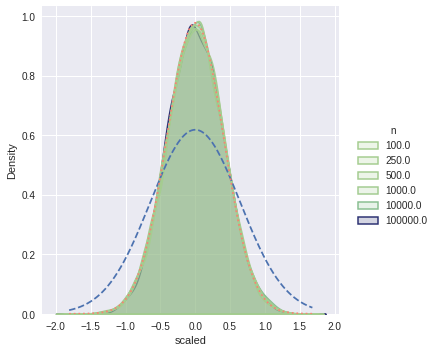

In [ ]:
target = {}

def rand(n):
  sample = np.random.uniform(0,1,n)
  return sample

target['niter'] = 10000
target['simulation'] = rand
target['presence'] = 0.5
target['n_sample'] = [100,250,500,1000,10000,100000]

mean = 1/2
cov = np.sqrt(1/12)
	
dataset = simu(target, know = False)
df_FMado = pd.DataFrame(np.concatenate(dataset))
df_FMado.columns = ['estimate', 'n', 'gp', 'prob']

df_FMado['scaled'] = (df_FMado.estimate - mean) * np.sqrt(df_FMado.n)
m = 0
sigma = np.sqrt(var_missing(target['presence'], mean, cov))
sigma_2 = np.sqrt(var_miss(target['presence'], cov))
x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,m, sigma)
gauss_2 = gauss_function(x, m, sigma_2)

cmap = cm.get_cmap('OrRd')
sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'kde', common_norm = False, alpha = 0.2, fill = True, linewidth = 1.5)
plt.plot(x,gauss, linestyle = '--')
plt.plot(x, gauss_2, c = 'salmon', linestyle = 'dotted')
plt.show()